## data augmentation layer to add to the image model

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


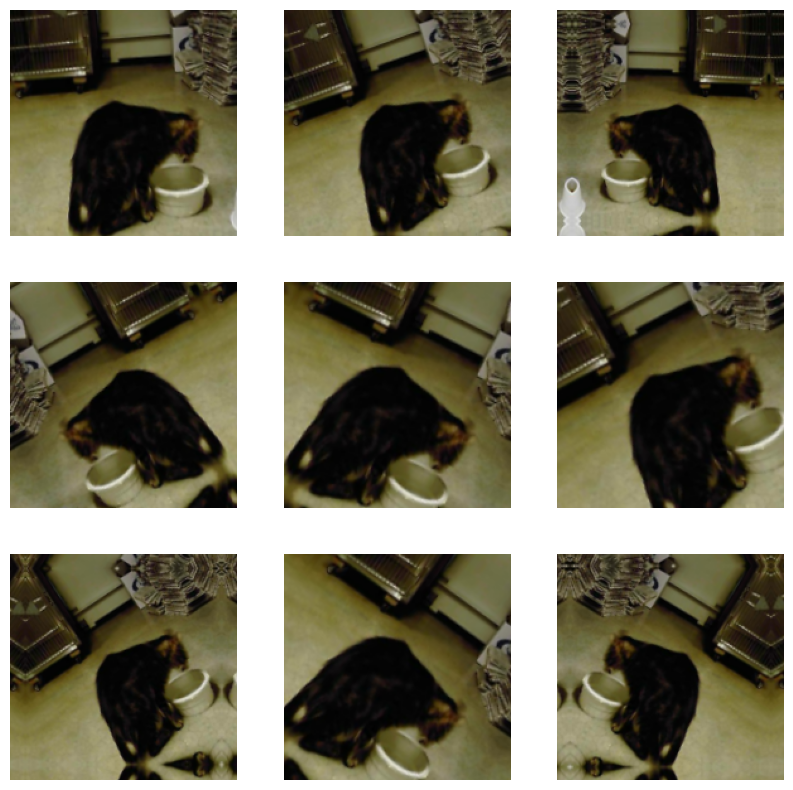

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small\\train",
    image_size=(180,180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small\\validation",
    image_size=(180,180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small\\test",
    image_size=(180,180),
    batch_size=32)

data_augmentation = keras.Sequential(
    [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
    ]
)

#displaying some randomly augmentated training images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [2]:
#defining the new convnet including image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3)) #the model expects RGB images o fsize 180 X 180
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x) #rescale inputs to yhe [0, 1] range by dividing them by 255
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 27s 258ms/step - loss: 0.7053 - accuracy: 0.4925 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 15s 243ms/step - loss: 0.7014 - accuracy: 0.5395 - val_loss: 0.6914 - val_accuracy: 0.5010
Epoch 3/100
63/63 [==============================] - 15s 239ms/step - loss: 0.6932 - accuracy: 0.5410 - val_loss: 1.8056 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 16s 247ms/step - loss: 0.6762 - accuracy: 0.5870 - val_loss: 0.6545 - val_accuracy: 0.5840
Epoch 5/100
63/63 [==============================] - 16s 247ms/step - loss: 0.6524 - accuracy: 0.6385 - val_loss: 0.8325 - val_accuracy: 0.5220
Epoch 6/100
63/63 [==============================] - 16s 253ms/step - loss: 0.6347 - accuracy: 0.6460 - val_loss: 0.6312 - val_accuracy: 0.6260
Epoch 7/100
63/63 [==============================] - 16s 251ms/step - loss: 0.6229 - accuracy: 0.6510 - val_loss: 0.6510 - val_accuracy:

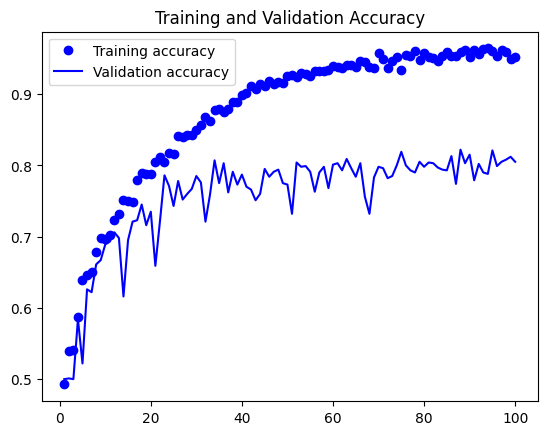

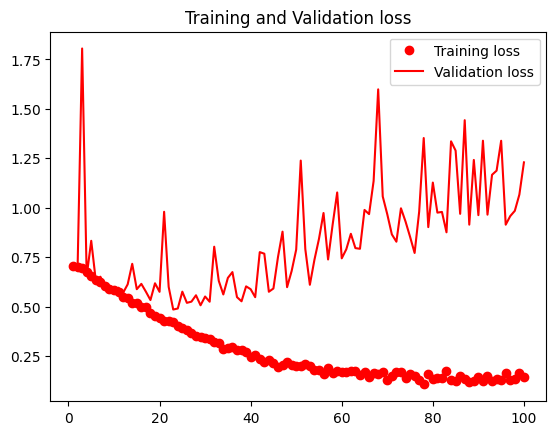

In [3]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()